In [16]:
# !pip install mlxtend


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori , association_rules
from sklearn.preprocessing import LabelEncoder

In [18]:
train =  pd.read_csv('../train.csv')
test =  pd.read_csv('../test.csv')

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)
X = train.drop('satisfaction', axis=1)
train

Train data shape: (103904, 25)
Test data shape: (25976, 25)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [19]:
for i in X.columns:
    X[i] = X[i].astype('str')

# change the categorical data to one hot encoded different columns 
# as the apriori algorithm takes only numerical data 
train_encoded = pd.get_dummies(X)

frequent_itemsets = apriori(train_encoded, min_support=0.25, use_colnames=True)

frequent_itemsets 


d:\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.507459,(Gender_Female)
1,0.492541,(Gender_Male)
2,0.817322,(Customer Type_Loyal Customer)
3,0.689627,(Type of Travel_Business travel)
4,0.310373,(Type of Travel_Personal Travel)
...,...,...
56,0.253494,"(Customer Type_Loyal Customer, Type of Travel_..."
57,0.373701,"(Customer Type_Loyal Customer, Departure Delay..."
58,0.257892,"(Type of Travel_Business travel, Departure Del..."
59,0.260019,"(Type of Travel_Business travel, Arrival Delay..."


In [20]:
rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Female),(Type of Travel_Business travel),0.507459,0.689627,0.351555,0.692776,1.004566,0.001598,1.010250,0.009229
1,(Type of Travel_Business travel),(Gender_Female),0.689627,0.507459,0.351555,0.509776,1.004566,0.001598,1.004727,0.014645
2,(Gender_Female),(Departure Delay in Minutes_0),0.507459,0.564637,0.286794,0.565156,1.000921,0.000264,1.001195,0.001867
3,(Departure Delay in Minutes_0),(Gender_Female),0.564637,0.507459,0.286794,0.507926,1.000921,0.000264,1.000949,0.002113
4,(Customer Type_Loyal Customer),(Gender_Male),0.817322,0.492541,0.408695,0.500041,1.015227,0.006130,1.015001,0.082105
...,...,...,...,...,...,...,...,...,...,...
65,(Class_Business),"(Type of Travel_Business travel, Arrival Delay...",0.477989,0.384692,0.260019,0.543985,1.414080,0.076140,1.349315,0.560959
66,"(Departure Delay in Minutes_0, Type of Travel_...",(Arrival Delay in Minutes_0.0),0.389196,0.559738,0.314415,0.807859,1.443281,0.096568,2.291346,0.502835
67,"(Type of Travel_Business travel, Arrival Delay...",(Departure Delay in Minutes_0),0.384692,0.564637,0.314415,0.817318,1.447511,0.097204,2.383170,0.502445
68,(Departure Delay in Minutes_0),"(Type of Travel_Business travel, Arrival Delay...",0.564637,0.384692,0.314415,0.556845,1.447511,0.097204,1.388473,0.710117


In [31]:
rules_df = rules_df.sort_values(['confidence', 'lift'], ascending =[False, False])
rules_df[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Type of Travel_Personal Travel),(Customer Type_Loyal Customer),0.310373,0.817322,0.308795,0.994915,1.217286,0.055120,35.921894,0.258836
46,"(Type of Travel_Personal Travel, Class_Eco)",(Customer Type_Loyal Customer),0.254928,0.817322,0.253494,0.994375,1.216626,0.045136,32.475042,0.238976
62,"(Arrival Delay in Minutes_0.0, Class_Business)",(Type of Travel_Business travel),0.271395,0.689627,0.260019,0.958084,1.389278,0.072858,7.404576,0.384573
57,"(Departure Delay in Minutes_0, Class_Business)",(Type of Travel_Business travel),0.269345,0.689627,0.257892,0.957479,1.388401,0.072144,7.299244,0.382871
21,(Class_Business),(Type of Travel_Business travel),0.477989,0.689627,0.457230,0.956569,1.387082,0.127595,7.146350,0.534591
38,"(Customer Type_Loyal Customer, Class_Business)",(Type of Travel_Business travel),0.407193,0.689627,0.386539,0.949278,1.376509,0.105728,6.119093,0.461406
15,(Seat comfort_4),(Customer Type_Loyal Customer),0.305715,0.817322,0.269085,0.880183,1.076911,0.019217,1.524639,0.102865
12,(Online boarding_4),(Customer Type_Loyal Customer),0.296062,0.817322,0.259653,0.877024,1.073046,0.017675,1.485474,0.096703
11,(Class_Business),(Customer Type_Loyal Customer),0.477989,0.817322,0.407193,0.851888,1.042292,0.016522,1.233376,0.077730
37,"(Type of Travel_Business travel, Class_Business)",(Customer Type_Loyal Customer),0.457230,0.817322,0.386539,0.845394,1.034347,0.012836,1.181576,0.061180


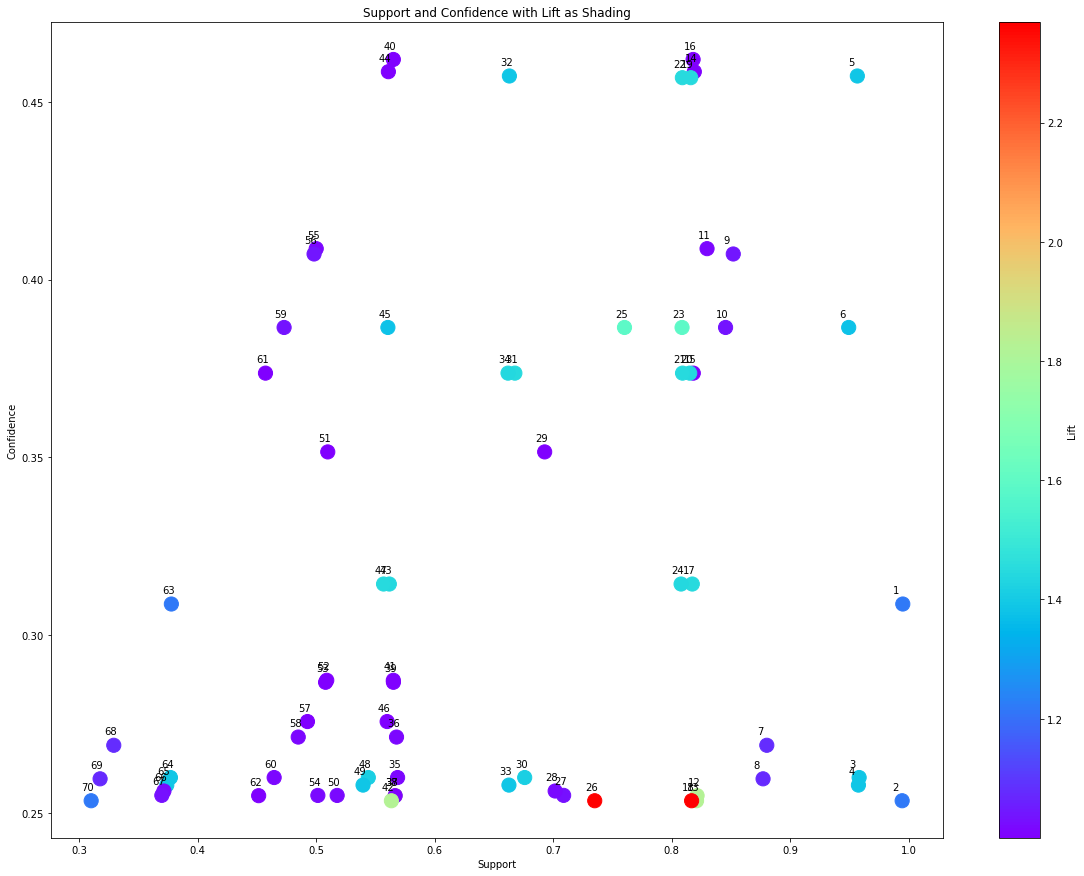

In [29]:
support = rules_df['support'].values
confidence = rules_df['confidence'].values
lift = rules_df['lift'].values


plt.figure(figsize=(20,15))
plt.scatter(confidence, support, c=lift, cmap='rainbow', s=200)

for i in range(len(support)):
    plt.annotate(str(i+1), (confidence[i]-8e-3, support[i]+3e-3))
   
    
# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Lift')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support and Confidence with Lift as Shading')

# Show the plot
plt.show()

# the most important rules are

the heights rules is the  rules that have the heighest  confidence and lift 

**1-rule 9 (Type of Travel = Personal Travel => Customer Type = Loyal Customer)**

**2-rule 46 (Type of Travel = Personal Travel, Class = Eco =>Customer Type = Loyal Customer)**

**3-rule 62 (Arrival Delay in Minutes  = 0.0, Class_Business => Type of Travel=Business travel)**

**4-rule 57 (Departure Delay in Minutes = 0, Class = Business => Type of Travel_Business travel)**

**5-rule 21 (Class = Business => Type of Travel = Business travel)**

**6-rule 35 (Customer Type = Loyal Customer, Class = Business => Type of Travel = Business travel)**

**7-rule 15 (Seat comfort = 4 => Customer Type = Loyal Customer)**

**8-rule 12 (Online boarding = 4 => Customer Type = Loyal Customer)**

**9-rule 11 (Class = Business => Customer Type = Loyal Customer)**

**10-rule 37 (Type of Travel = Business travel, Class = Business => Customer Type = Loyal Customer)**

the Type of Travel seems to be a very important attribute as it appears in the most of the rules 